# Lab 3b: Graphs II

Lab associated with Module 3b: Graphs II

***

In [1]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

***

### Section 0: Imports

In [2]:
import numpy as np

In [3]:
import math

In [4]:
from IPython.display import Image
from graphviz import Digraph

Details of Digraph package: https://h1ros.github.io/posts/introduction-to-graphviz-in-jupyter-notebook/

***

### Section 1: Graph Preliminaries

Let us start by implementing our Node and Graph data structure to incorporate weights in the graph

In [5]:
class Node:
    
    def __init__(self, v):

        self.value = v
        self.inNeighbors = []
        self.outNeighbors = []
        
        self.status = "unvisited"
        self.estD = np.inf
        
    def hasOutNeighbor(self, v):
        
        if v in self.outNeighbors:
            return True
        
        return False
        
    def hasInNeighbor(self, v):
        
        if v in self.inNeighbors:
            return True
        
        return False
    
    def hasNeighbor(self, v):
        
        if v in self.inNeighbors or v in self.outNeighbors:
            return True
        
        return False
    
    def getOutNeighbors(self):
        
        return self.outNeighbors
    
    def getInNeighbors(self):
        
        return self.inNeighbors
    
    def getOutNeighborsWithWeights(self):
        
        return self.outNeighbors
    
    def getInNeighborsWithWeights(self):
        
        return self.inNeighbors
    
    # ------------------------------------------------
    # Let us modify following two functions to incorporate weights
    # ------------------------------------------------
    
    def addOutNeighbor(self,v,wt):
        
        self.outNeighbors.append((v,wt))
    
    def addInNeighbor(self,v,wt):
        
        self.inNeighbors.append((v,wt))
        
        
    def __str__(self):
        
        return str(self.value) 

In [6]:
class Graph:
    
    def __init__(self):
        
        self.vertices = []

    def addVertex(self,n):
        
        self.vertices.append(n)
        
    # ------------------------------------------------
    # Let us modify following two functions to incorporate weights
    # ------------------------------------------------
        
    def addDiEdge(self, u, v, wt = 1):
        
        u.addOutNeighbor(v, wt = wt)
        v.addInNeighbor(u, wt = wt)
        
    # add edges in both directions between u and v
    def addBiEdge(self, u, v, wt = 1):
        
        self.addDiEdge(u, v, wt = wt)
        self.addDiEdge(v, u, wt = wt)
        
            
    # get a list of all the directed edges
    # directed edges are a list of two vertices
    def getDirEdges(self):
        
        ret = []
        for v in self.vertices:
            ret += [ [v, u] for u in v.outNeighbors ]
        return ret
    
    # reverse the edge between u and v.  Multiple edges are not supported.
    def reverseEdge(self,u,v):
        
        if u.hasOutNeighbor(v) and v.hasInNeighbor(u):
            
            if v.hasOutNeighbor(u) and u.hasInNeighbor(v): 
                return
        
            self.addDiEdge(v, u)
            u.outNeighbors.remove(v)
            v.inNeighbors.remove(u)        
                
    def __str__(self):
        
        ret = "Graph with:\n"
        ret += "\t Vertices:\n\t"
        for v in self.vertices:
            ret += str(v) + ","
        ret += "\n"
        ret += "\t Edges:\n\t"
        for a,b in self.getDirEdges():
            ret += "(" + str(a) + "," + str(b) + ") "
        ret += "\n"
        return ret

Now that we have incorporated the weights, let us devise a plan to generate the graph

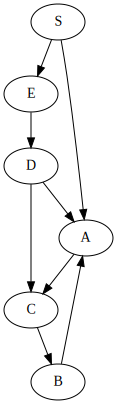

In [7]:
dot = Digraph()

dot.edge('S', 'E')
dot.edge('S', 'A')
dot.edge('E', 'D')
dot.edge('D', 'A')
dot.edge('A', 'C')
dot.edge('B', 'A')
dot.edge('D', 'C')
dot.edge('C', 'B')

#dot.view()
dot

In [8]:
G = Graph()
#for i in ['0', '1', '2', '3', '4', '5']:
for i in ['S', 'E', 'A', 'D', 'B', 'C']:
    G.addVertex( Node(i) )

V = G.vertices

#dot.edge('S', 'E')
G.addDiEdge( V[0], V[1], 8)

#dot.edge('S', 'A')
G.addDiEdge( V[0], V[2] , 10)

#dot.edge('E', 'D')
G.addDiEdge( V[1], V[3], 1)

#dot.edge('D', 'A')
G.addDiEdge( V[3], V[2], 2)

#dot.edge('A', 'C')
G.addDiEdge( V[2], V[5], 2)

#dot.edge('B', 'A')
G.addDiEdge( V[4], V[2], 1 )

#dot.edge('D', 'C')
G.addDiEdge( V[3], V[5], 8)

#dot.edge('C', 'B')
G.addDiEdge( V[5], V[4], 4 )

print(G)

Graph with:
	 Vertices:
	S,E,A,D,B,C,
	 Edges:
	(S,(<__main__.Node object at 0x000001E3D84D53D0>, 8)) (S,(<__main__.Node object at 0x000001E3D84D5400>, 10)) (E,(<__main__.Node object at 0x000001E3D84D5100>, 1)) (A,(<__main__.Node object at 0x000001E3D84D5E20>, 2)) (D,(<__main__.Node object at 0x000001E3D84D5400>, 2)) (D,(<__main__.Node object at 0x000001E3D84D5E20>, 8)) (B,(<__main__.Node object at 0x000001E3D84D5400>, 1)) (C,(<__main__.Node object at 0x000001E3D84D5700>, 4)) 



Second Example

In [9]:
G = Graph()
#for i in ['0', '1', '2', '3', '4', '5']:
for i in ['S', 'A', 'B']:
    G.addVertex( Node(i) )
    
V = G.vertices

G.addDiEdge( V[0], V[1], 3)

G.addDiEdge( V[0], V[2] , 4)

G.addDiEdge( V[2], V[1], -2)

In [10]:
print(G)

Graph with:
	 Vertices:
	S,A,B,
	 Edges:
	(S,(<__main__.Node object at 0x000001E3D84DC700>, 3)) (S,(<__main__.Node object at 0x000001E3D84DC880>, 4)) (B,(<__main__.Node object at 0x000001E3D84DC700>, -2)) 



***

### Section 2: Dijkstra Algorithm

In [11]:
len(G.vertices)

3

In [12]:
def dijkstra(w, G):
    
    for v in G.vertices:
        v.estD = math.inf
        
    w.estD = 0
    unsureVertices = G.vertices[:]
    
    sureVertices = []
    
    while len(unsureVertices) > 0:
    
        # find the u with the minimum estD in the dumbest way possible
        u = None
        minD = math.inf
        for x in unsureVertices:
            if x.estD < minD:
                minD = x.estD
                u = x
        
        if u == None:
            # then there is nothing more that I can reach
            return
        
        # update u's neighbors
        for v, wt in u.getOutNeighborsWithWeights():
            
            if v in sureVertices:
                continue
            
            if u.estD + wt < v.estD:
                v.estD = u.estD + wt
        
        unsureVertices.remove(u)
        sureVertices.append(u)
    
    # that's it!  Now each vertex holds estD which is its distance from w

In [13]:
w = G.vertices[0]
dijkstra(w, G)

for v in G.vertices:
    print(v.value, v.estD)

S 0
A 3
B 4


***

## <font color='red'> Activity 1: Code Reflections. </font>

In [14]:
def dijkstra_parent(w, G):
    
    for v in G.vertices:
        v.estD = math.inf
        
    w.estD = 0
    unsureVertices = G.vertices[:]
    
    sureVertices = []
    
    while len(unsureVertices) > 0:
    
        # find the u with the minimum estD in the dumbest way possible
        u = None
        minD = math.inf
        for x in unsureVertices:
            if x.estD < minD:
                minD = x.estD
                u = x
        
        if u == None:
            # then there is nothing more that I can reach
            return
        
        # update u's neighbors
        for v, wt in u.getOutNeighborsWithWeights():
            
            if v in sureVertices:
                continue
            
            if u.estD + wt < v.estD:
                v.estD = u.estD + wt
                v.parent = u # added to make ease of tracing route for shortest path
        unsureVertices.remove(u)
        sureVertices.append(u)
    
    # that's it!  Now each vertex holds estD which is its distance from w

In [15]:
    def print_dijkstra_shortestPaths(src, G):
        dijkstra_parent(src, G)
        # okay, now what are all the shortest paths?
        for vertex in G.vertices:
            shortest_path = []
            current_node = vertex
            while current_node != src:
                shortest_path.append(current_node) 
                current_node = current_node.parent # next in line is selected as current node before choosing the shortest path from here and updating the shortest_path array
            shortest_path.append(current_node) #ONCE TRUE FINAL current node is appended
            shortest_path.reverse() # reverse list to show shortest path
            print([str(node) for node in shortest_path]) #PRINT ALL NODES IN LIST


In [16]:
print_dijkstra_shortestPaths(w, G)

['S']
['S', 'A']
['S', 'B']


### <font color='red'> Activity 2: Modify above code to do Bellman-Ford. Make sure you test for negative cycles and compare its performance with Dijkstra. </font>

In [17]:
#### TODO ####
### Good Luck ###




def dijkstra(w, G):
    
    for v in G.vertices:
        v.estD = math.inf   #initialise to infinity
        
    w.estD = 0
    unsureVertices = G.vertices[:]
    
    sureVertices = []
    
    while len(unsureVertices) > 0:
    
        # find the u with the minimum estD in the dumbest way possible
        u = None
        minD = math.inf
        for x in unsureVertices:
            if x.estD < minD:
                minD = x.estD
                u = x
        
        if u == None:
            # then there is nothing more that I can reach
            return
        
        # update u's neighbors
        for v, wt in u.getOutNeighborsWithWeights():
            
            if v in sureVertices:
                continue
            
            if u.estD + wt < v.estD:
                v.estD = u.estD + wt
        
        unsureVertices.remove(u)
        sureVertices.append(u)
    
    # that's it!  Now each vertex holds estD which is its distance from w




In [18]:
### geeks for geeks example

#     def BellmanFord(self, src):
 
#         # Step 1: Initialize distances from src to all other vertices
#         # as INFINITE
#         dist = [float("Inf")] * self.V
#         dist[src] = 0
 
#         # Step 2: Relax all edges |V| - 1 times. A simple shortest
#         # path from src to any other vertex can have at-most |V| - 1
#         # edges
#         for _ in range(self.V - 1):
#             # Update dist value and parent index of the adjacent vertices of
#             # the picked vertex. Consider only those vertices which are still in
#             # queue
#             for u, v, w in self.graph:
#                 if dist[u] != float("Inf") and dist[u] + w < dist[v]:
#                     dist[v] = dist[u] + w
 
#         # Step 3: check for negative-weight cycles. The above step
#         # guarantees shortest distances if graph doesn't contain
#         # negative weight cycle. If we get a shorter path, then there
#         # is a cycle.
 
#         for u, v, w in self.graph:
#             if dist[u] != float("Inf") and dist[u] + w < dist[v]:
#                 print("Graph contains negative weight cycle")
#                 return
 
#         # print all distance
#         self.printArr(dist)

In [19]:
G = Graph()
#for i in ['0', '1', '2', '3', '4', '5']:
for i in ['S', 'E', 'A', 'D', 'B', 'C']:
    G.addVertex( Node(i) )

V = G.vertices

#dot.edge('S', 'E')
G.addDiEdge( V[0], V[1], 8)

#dot.edge('S', 'A')
G.addDiEdge( V[0], V[2] , 10)

#dot.edge('E', 'D')
G.addDiEdge( V[1], V[3], 1)

#dot.edge('D', 'A')
G.addDiEdge( V[3], V[2], -41)

#dot.edge('A', 'C')
G.addDiEdge( V[2], V[5], 2)

#dot.edge('B', 'A')
G.addDiEdge( V[4], V[2], 1 )

#dot.edge('D', 'C')
G.addDiEdge( V[3], V[5], -12)

#dot.edge('C', 'B')
G.addDiEdge( V[5], V[4], -22 )

print(G)

Graph with:
	 Vertices:
	S,E,A,D,B,C,
	 Edges:
	(S,(<__main__.Node object at 0x000001E3D84DCBB0>, 8)) (S,(<__main__.Node object at 0x000001E3D84DC3D0>, 10)) (E,(<__main__.Node object at 0x000001E3D84DCDF0>, 1)) (A,(<__main__.Node object at 0x000001E3D84DC460>, 2)) (D,(<__main__.Node object at 0x000001E3D84DC3D0>, -41)) (D,(<__main__.Node object at 0x000001E3D84DC460>, -12)) (B,(<__main__.Node object at 0x000001E3D84DC3D0>, 1)) (C,(<__main__.Node object at 0x000001E3D84DCD00>, -22)) 



In [20]:
def Bellman_Ford(src, Graph):
    negative_cycle = False

    for Vertex in Graph.vertices:
        Vertex.estD = math.inf  # Step 1 Initialise

    src.estD = 0  # Step 2 - set src node distance to 0
    for i in range(len(Graph.vertices)):
        for Node in Graph.vertices: #length of vertices interated through with keyword node
            # update u's neighbors
            for Vertex, weight in Node.getOutNeighborsWithWeights():
                if Vertex.estD > Node.estD + weight:  # step 3 - relax each edge
                    Vertex.estD = Node.estD + weight
#iterate through again to detect negative cycle
    # Check for Negative Cycle
    for Node in Graph.vertices:
        for Vertex, weight in Node.getOutNeighborsWithWeights():  # Check for Negative Cycle
            if Vertex.estD > (Node.estD + weight) and (Node != math.inf):  #negative cycle
                negative_cycle = True # Negative cycle update to true
                break

    return negative_cycle, Node.value, "directed to" , Vertex.value 


In [21]:
w = G.vertices[0]


Bellman_Ford(w, G)


(True, 'C', 'directed to', 'B')

## <font color='red'> Activity 3: Have a look at the following Python's implementation of heap (priority Queues): HeapDict, and try to convert our Dijkstra's implementation to use this heap data structure instead. </font>

  # This is the example given from lab

def dijkstra(w, G):
    
    for v in G.vertices:
        v.estD = math.inf
        
    w.estD = 0
    heap[w] = 0
    unsureVertices = G.vertices[:]
    
    sureVertices = []
    
    while len(unsureVertices) > 0:
    
        # find the u with the minimum estD in the dumbest way possible
        u = None
        minD = math.inf
        for x in unsureVertices:
            if x.estD < minD:
                minD = x.estD
                u = x
        
        if u == None:
            # then there is nothing more that I can reach
            return
        
        # update u's neighbors
        for v, wt in u.getOutNeighborsWithWeights():
            
            if v in sureVertices:
                continue
            
            if u.estD + wt < v.estD:
                v.estD = u.estD + wt
        
        unsureVertices.remove(u)
        sureVertices.append(u)
    
    # that's it!  Now each vertex holds estD which is its distance from w
    
  

# Create Graph

In [22]:
G = Graph()
#for i in ['0', '1', '2', '3', '4', '5']:
for i in ['S', 'E', 'A', 'D', 'B', 'C']:
    G.addVertex( Node(i) )

V = G.vertices

#dot.edge('S', 'E')
G.addDiEdge( V[0], V[1], 8)

#dot.edge('S', 'A')
G.addDiEdge( V[0], V[2] , 10)

#dot.edge('E', 'D')
G.addDiEdge( V[1], V[3], 1)

#dot.edge('D', 'A')
G.addDiEdge( V[3], V[2], 2)

#dot.edge('A', 'C')
G.addDiEdge( V[2], V[5], 2)

#dot.edge('B', 'A')
G.addDiEdge( V[4], V[2], 1 )

#dot.edge('D', 'C')
G.addDiEdge( V[3], V[5], 8)

#dot.edge('C', 'B')
G.addDiEdge( V[5], V[4], 4 )

print(G)

Graph with:
	 Vertices:
	S,E,A,D,B,C,
	 Edges:
	(S,(<__main__.Node object at 0x000001E3D850B4F0>, 8)) (S,(<__main__.Node object at 0x000001E3D84D51F0>, 10)) (E,(<__main__.Node object at 0x000001E3D84D5CA0>, 1)) (A,(<__main__.Node object at 0x000001E3D84D5040>, 2)) (D,(<__main__.Node object at 0x000001E3D84D51F0>, 2)) (D,(<__main__.Node object at 0x000001E3D84D5040>, 8)) (B,(<__main__.Node object at 0x000001E3D84D51F0>, 1)) (C,(<__main__.Node object at 0x000001E3D84D5FA0>, 4)) 



In [23]:
print(G)

Graph with:
	 Vertices:
	S,E,A,D,B,C,
	 Edges:
	(S,(<__main__.Node object at 0x000001E3D850B4F0>, 8)) (S,(<__main__.Node object at 0x000001E3D84D51F0>, 10)) (E,(<__main__.Node object at 0x000001E3D84D5CA0>, 1)) (A,(<__main__.Node object at 0x000001E3D84D5040>, 2)) (D,(<__main__.Node object at 0x000001E3D84D51F0>, 2)) (D,(<__main__.Node object at 0x000001E3D84D5040>, 8)) (B,(<__main__.Node object at 0x000001E3D84D51F0>, 1)) (C,(<__main__.Node object at 0x000001E3D84D5FA0>, 4)) 



## Implemented the dijstra algortithm with a heap

In [24]:
import heapdict as hd

In [25]:
# now let's try this with a heap
def dijkstraheap(src, G):
    for vertex in G.vertices: 
        vertex.estD = math.inf # Step 1 Initialise
    src.estD = 0# Step 2 - set src node distance to 0
    heap = hd.heapdict()  #convert unsure vertices to heapdict named 'heap'
    for vertex in G.vertices:
        heap[vertex] = vertex.estD
    while len(heap) > 0:
        # find the u with the minimum estD, using the heap
        node, dist = heap.popitem()
        if node.estD == math.inf:
            # then there is nothing more that I can reach
            return
        # update u's neighbors
        for vertex,weight in node.getOutNeighborsWithWeights():
            if node.estD + weight < vertex.estD:
                vertex.estD = node.estD + weight 
                heap[vertex] = node.estD + weight #update the VALUE FOR SPECIFIC VERTEX key in the heapdict
                vertex.parent = node # keep track of the visits and update the nodes locally with their calculated parent for shortest path
    # that's it!  Now each vertex holds estD which is its distance from w
    
    #NODE POINTS TO VERTEX

In [26]:
def print_dijstraheap_shortestpaths(src, G):
    dijkstraheap(src, G)
    # okay, now what are all the shortest paths?
    for vertex in G.vertices:
        if vertex.estD == math.inf:
            print("Cannot reach " + str(vertex))
            continue
        route = []
        current_node = vertex
        while current_node != src:
            route.append(current_node)
            current_node = current_node.parent
        route.append(current_node)
        route.reverse()
        print([str(x) for x in route])

In [27]:
w = G.vertices[0]
dijkstra(w, G)

for v in G.vertices:
    print(v.value, v.estD)

S 0
E 8
A 10
D 9
B 16
C 12


In [28]:
print_dijstraheap_shortestpaths(w,G)


['S']
['S', 'E']
['S', 'A']
['S', 'E', 'D']
['S', 'A', 'C', 'B']
['S', 'A', 'C']


In [29]:
print_dijkstra_shortestPaths(w, G)

['S']
['S', 'E']
['S', 'A']
['S', 'E', 'D']
['S', 'A', 'C', 'B']
['S', 'A', 'C']


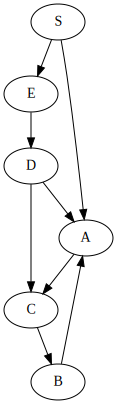

In [30]:
dot = Digraph()

dot.edge('S', 'E')
dot.edge('S', 'A')
dot.edge('E', 'D')
dot.edge('D', 'A')
dot.edge('A', 'C')
dot.edge('B', 'A')
dot.edge('D', 'C')
dot.edge('C', 'B')

#dot.view()
dot

***

### Section 4: Dynammc Programming

We discussed Fibonacci numbers sequence as a good example of Dynamic Programming. Let us have a look at its computation.

## Recursive Implementation

In [31]:
def Fibonacci(n):
    if n == 0 or n == 1:
        return 1
    return Fibonacci(n-1) + Fibonacci(n-2)
                

## Dynamic Programming (DP) Implementation

In [32]:
def fasterFibonacci(n):
    
    F = [1 for i in range(n+1)]

    for i in range(2,n+1):
        F[i] = F[i-1] + F[i-2]
        
    return F[n]

In [33]:
fasterFibonacci(9)

55

## Recursive with memory

In [34]:
def Fibonacci_topdown(n,F):
    
    if F[n] != None:
        return F[n]
    
    F[n] = Fibonacci_topdown(n-1, F) + Fibonacci_topdown(n-2, F)
    return F[n]

Have a look at above different ways to compute Fibonacci numbers. Report on their running time. Make sure you know the difference between them.

***

### <font color='red'> Activity 4: Write a brief report comparing 'Dynamic Programming' with 'Divide-and-Conquer' strategy? (If you are not familiar with Divide-and-Conquer strategy - revisit Quick Sort or Binary Search algorithms. You should address why we can not use DP for Quick Sort or Binary Sort). </font>

Divide and Conquer vs Dynamic Programming
Divide and Conquer programming and dynamic programming are a type of algorithm and algorithm design paradigm when it comes to problem solving approaches in coding. : This algorithm design paradigm breaks a problem into sub-problems, solves a single sub-problem, and merges the solutions to get the final solution. It consists of the following three steps:

1.	Divide
2.	Solve recursively
3.	Merge

Hence the Name Divide and Conquer
In Dynamic Programming : This algorithm uses the concept of using the solution already found and saved to avoid re-computing the same part of the problem. It breaks down the problem into smaller, overlapping sub-problems and solves them via memorization and tabulation which in theory and practice reduces the amount of work needed to be done once a solution has already been found such that it uses the solution already found as opposed to starting over entirely. This paradigm should be used when the problem at hand has some kind of optimal sub-structure in meaning that one big problem consists of two smaller problems/solutions and there are overlapping problems/solutions. i.e the prior or post node in the route. Dynamic programming can be thought of as the combination of recursion and re-use memoization.

The understanding of the differences between dynamic programming and divide and conquer programming can be understood once it is understood why dynamic programming cant be applied to Quick sort or Merge sort is simply that although both sorts have the element of breaking the problem into smaller sub problems it still requires that each sub problem be sorted independent of the other sub problems result before being combined as opposed to the use of a stored solution to solve another sub problem, thus instances such as dijstras and bellman-ford can be taken into consideration as examples of dynamic programming in which the divide and conquer programming paradigm doesn’t apply. So depending on the problem at hand the choice can be between dynamic programming and Divide and Conquer programming paradigms pending of the exact specifications of requirements for the solving of the problem i.e if it gas overlapping subproblems and an optimal substructure to be broken into smaller problems which the optimal soloution can derive from to give the original problem i.e a + b = c or a[saved] + b = c


### <font color='red'> Activity 5: You are running up a staircase with a total of n steps. You can hop either 1 step, 2 steps or 3 steps at at time. Write a DP program to determine how many possible ways you can run up the stairs? (Hint: Start with a recursive solution, and then later move to top-down approach of DP). </font>

In [35]:
### TODO ###
### Good Luck ###

def Fibonacci(n):
    if n == 0 or n == 1:
        return 1
    return Fibonacci(n-1) + Fibonacci(n-2)
                





In [36]:
def staircase_run_solver(steps):
    if steps == 0 or steps == 1:
        return 1
    elif steps == 2:
        return 2
    else:
        return staircase_run_solver(steps - 3) + staircase_run_solver(steps - 2) + staircase_run_solver(steps - 1)

staircase_run_solver(9)

149

### <font color='red'> Activity 6: Implement Floyd-Warshal algorithm using above data structure (that is Node and Graph). Make sure to test all the use-cases. </font>

In [37]:
def floyd_warshall(Graph):
    total_vertices = len(Graph.vertices)
    distance = [[np.inf for _ in range(total_vertices)] for _ in range(total_vertices)]
    for i in range(total_vertices):
        distance[i][i] = 0

    for vertex in Graph.vertices:
        for outneigh, weight in vertex.getOutNeighborsWithWeights():
            distance[Graph.vertices.index(vertex)][Graph.vertices.index(outneigh)] = weight

    for k in range(total_vertices):
        for i in range(total_vertices):  # i = row
            for j in range(total_vertices):  # j = col
                distance[i][j] = min(distance[i][j], distance[i][k] + distance[k][j])

    return distance


In [38]:
x = floyd_warshall(G)
print(x)

[[0, 8, 10, 9, 16, 12], [inf, 0, 3, 1, 9, 5], [inf, inf, 0, inf, 6, 2], [inf, inf, 2, 0, 8, 4], [inf, inf, 1, inf, 0, 3], [inf, inf, 5, inf, 4, 0]]


***

***